In [1]:
# Importing dataset and libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import matplotlib.cm as cm
import seaborn as sns
from package import utilities as ut
from itertools import chain
import os

In [2]:
# Importing the dataset and plotting it interactively
G = nx.read_edgelist('data/414.edges', create_using=nx.Graph(),nodetype= int)
ut.draw_plotly_network(G)

Calculating coordinates
End


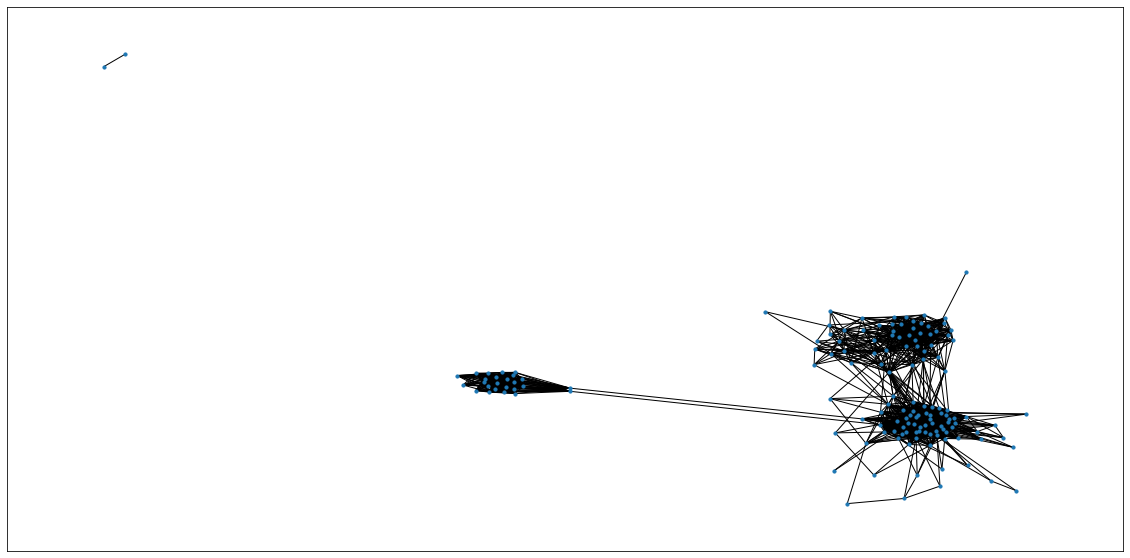

In [3]:
# Plotting the entire graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20,10))
nx.draw_networkx(G, pos= pos,with_labels= False,node_size=10)

In this graph it is clear that this network is not connected, the two components appear to be separate so we would expect to see unconnected network in the statistics

# Network Statistics

Statistics regarding structure of the network (is it connected?, is it bipartite?, etc).

In [4]:
# Summary of the graph
info = nx.info(G)
print(info)
# True if the graph is connected, false otherwise.
connected = nx.is_connected(G)
print("Network is connected?",connected)
# Returns True if graph G is bipartite, False if not.
bipartite = nx.is_bipartite(G)
print("Network is bipartite?",bipartite)
# Returns the value of the density
density = nx.density(G)
print("Network's density:",density)

Graph with 150 nodes and 1693 edges
Network is connected? False
Network is bipartite? False
Network's density: 0.15149888143176735


<ipython-input-4-7dc482ddbb4f>:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




In [6]:
# At this point we will use only one component for the analysis, this is the first component
G0 = G.subgraph(list(nx.connected_components(G))[0])
ut.draw_plotly_network(G0)

Calculating coordinates
End


In [7]:
# Here we have the second component
G1 = G.subgraph(list(nx.connected_components(G))[1])
G = G.subgraph(list(nx.connected_components(G))[0])
ut.draw_plotly_network(G1)

Calculating coordinates
End


In [8]:
# Computation of average clustering
avg_clustering = nx.average_clustering(G)
print("Network Average Clustering: ", avg_clustering)
# Calculates average distance
avg_distance = nx.average_shortest_path_length(G)
print("Network Average distance: ", avg_distance)
# Calculates diameter
diameter = nx.diameter(G, e=None, usebounds=False)
print("Network Diameter: ", diameter)

Network Average Clustering:  0.6793500241563418
Network Average distance:  2.691579334436477
Network Diameter:  7


In [9]:
# Computes degree centrality and most influential nodes
centrality = nx.degree_centrality(G)
print(" ")
print("----------Degree centrality----------")
print(" ")
for w in sorted(centrality, key=centrality.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality[w])
# PageRank centrality and most influential nodes
centrality_page_rank = nx.pagerank(G)
print(" ")
print("----------PageRank centrality----------")
print(" ")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])

 
----------Degree centrality----------
 
Most influent node:  376  Degree of:  0.3877551020408163
Most influent node:  373  Degree of:  0.36054421768707484
Most influent node:  513  Degree of:  0.3333333333333333
Most influent node:  428  Degree of:  0.32653061224489793
Most influent node:  483  Degree of:  0.31972789115646255
Most influent node:  348  Degree of:  0.30612244897959184
Most influent node:  591  Degree of:  0.30612244897959184
Most influent node:  559  Degree of:  0.30612244897959184
Most influent node:  436  Degree of:  0.29931972789115646
Most influent node:  475  Degree of:  0.29931972789115646
 
----------PageRank centrality----------
 
Most influent node:  376  Degree of:  0.014176860439897928
Most influent node:  592  Degree of:  0.013350040632997487
Most influent node:  428  Degree of:  0.013021903010352958
Most influent node:  630  Degree of:  0.012888302685379181
Most influent node:  579  Degree of:  0.012623345167734518
Most influent node:  373  Degree of:  0.0

## Analysis and distribution of Real Network

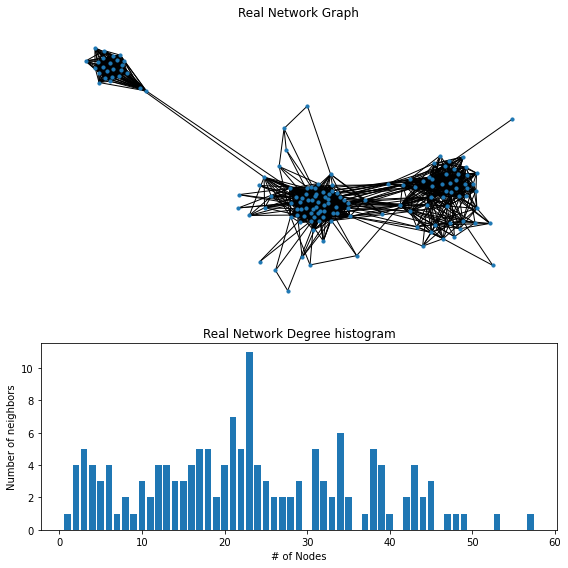

In [10]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos= pos,with_labels= False, node_size=10)
ax0.set_title("Real Network Graph")
ax0.set_axis_off()
# Second plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
# Create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
# Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Real Network Degree histogram")
ax1.set_xlabel("# of Nodes")
ax1.set_ylabel("Number of neighbors")
fig.tight_layout()
plt.show()

# Communities

Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices (best_partition).

In [11]:
# Compute the partition, the total number of communities is equal to 4
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
df_communities = pd.DataFrame(partition, index=[0]).T.reset_index()
df_communities.columns = ["nodes", "communities"]
print("How Many communities are there? ", len(set(values)))

How Many communities are there?  4


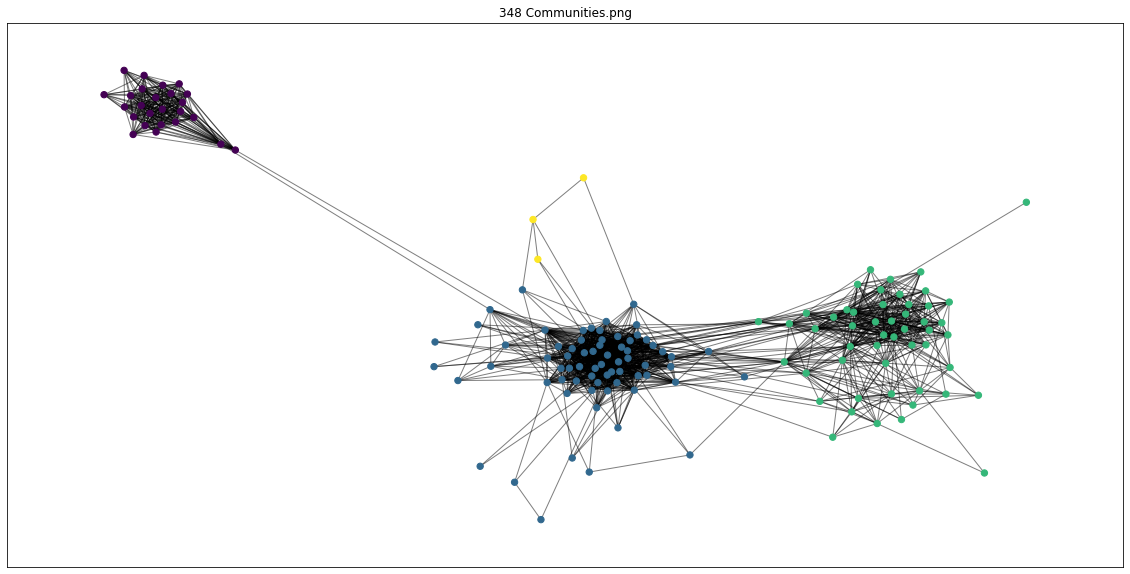

In [12]:
# Plot communities for network of node 348
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("414 Communities.png")
#plt.show()
plt.savefig("414 Communities.png")

In [27]:
# Summary of nodes in each community created
df_communities_statistics = df_communities.groupby("communities").count().sort_values("nodes", ascending=False).reset_index()
sorted_communities = list(df_communities_statistics.communities)
df_communities_statistics["communities"] = ["Community "+str(df_communities_statistics["communities"][x]) for x in range(len(df_communities_statistics))]


communities  nodes
0  Community 1     69
1  Community 2     51
2  Community 0     25
3  Community 3      3

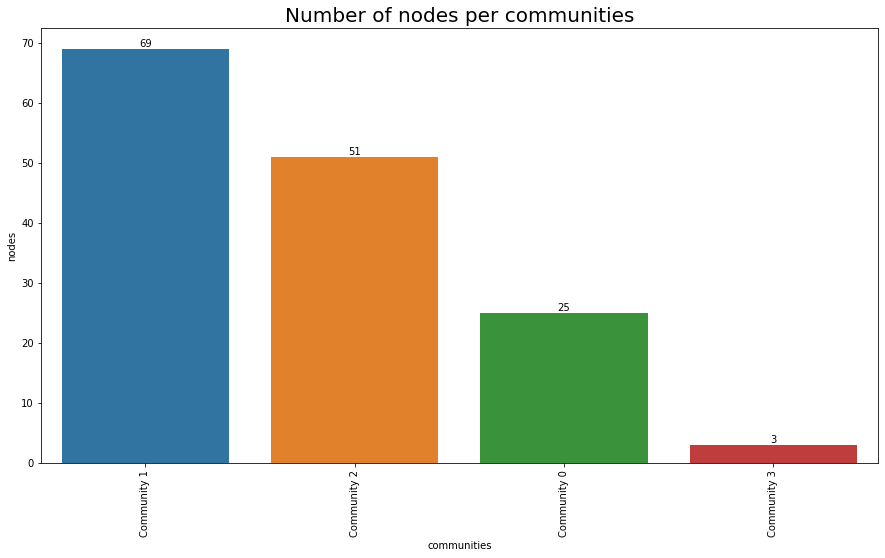

In [28]:
# Plot the number of nodes per community
plt.figure(figsize=(15,8))
ax = sns.barplot(x="communities",y="nodes", data=df_communities_statistics)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Number of nodes per communities", fontsize = 20)
plt.savefig("Number of nodes per community- 414 Network Node")

# Feature analysis


In [29]:
# Importing the feature dataset with the respective anonymized names
featnames = pd.read_csv("data/414.featnames",header=None,delim_whitespace=True)
feat = pd.read_csv("data/414.feat", sep= " ", names= ["node",]+ list(range(105))).set_index("node")
feat.columns = featnames[1].to_list()
feat = feat.reset_index()

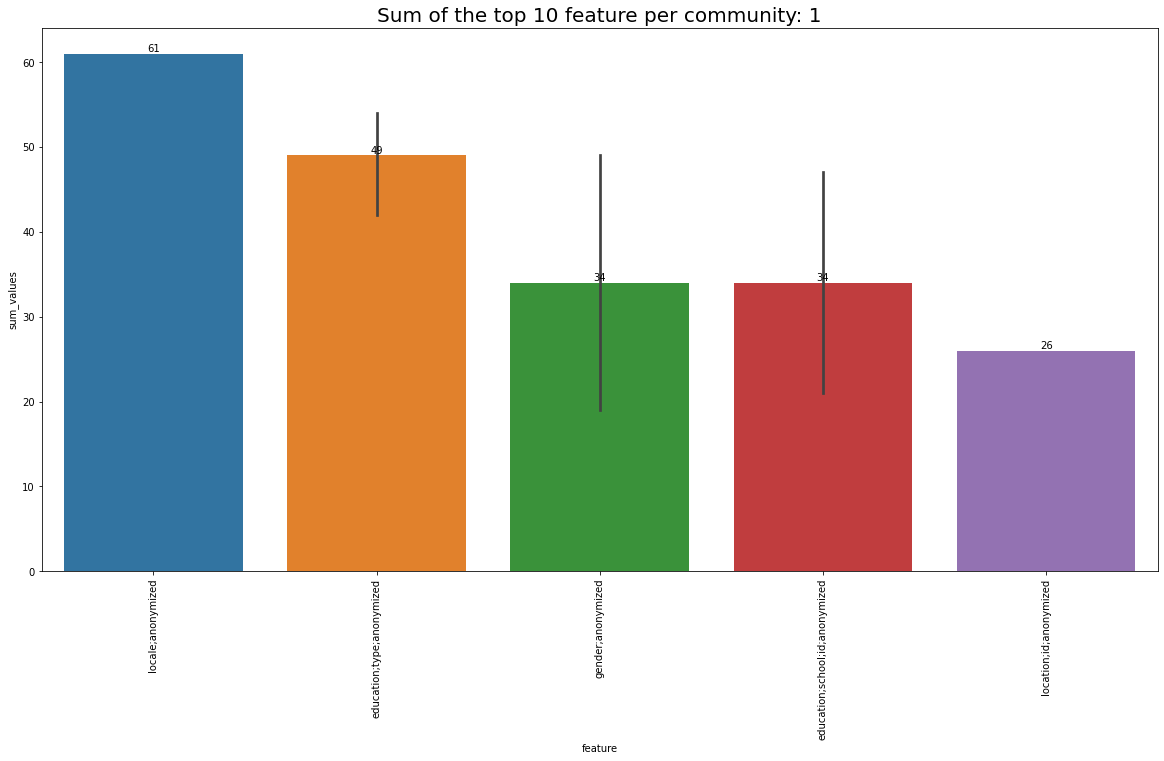

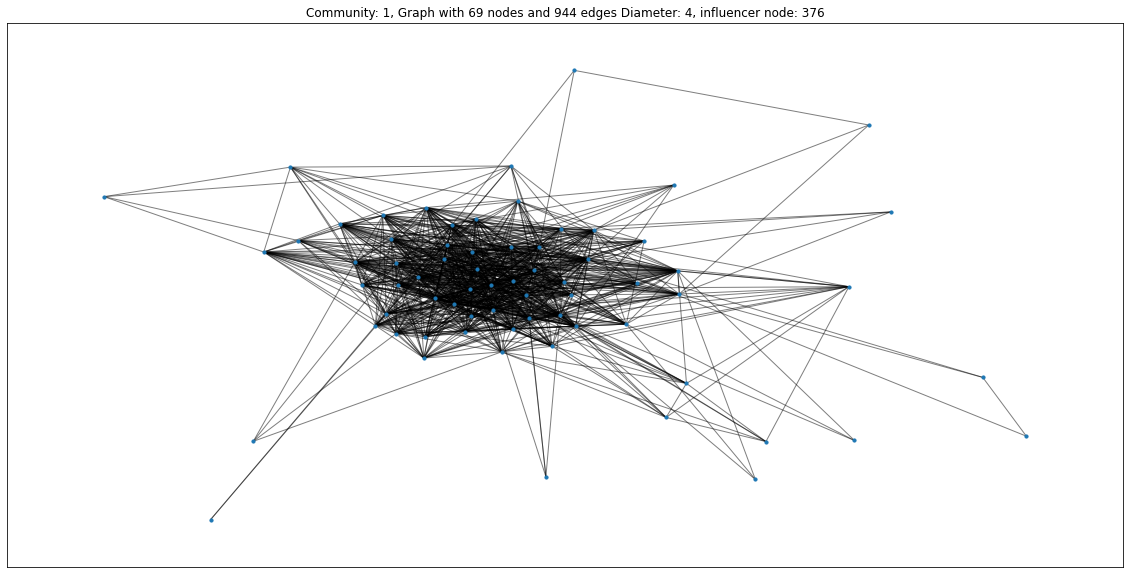

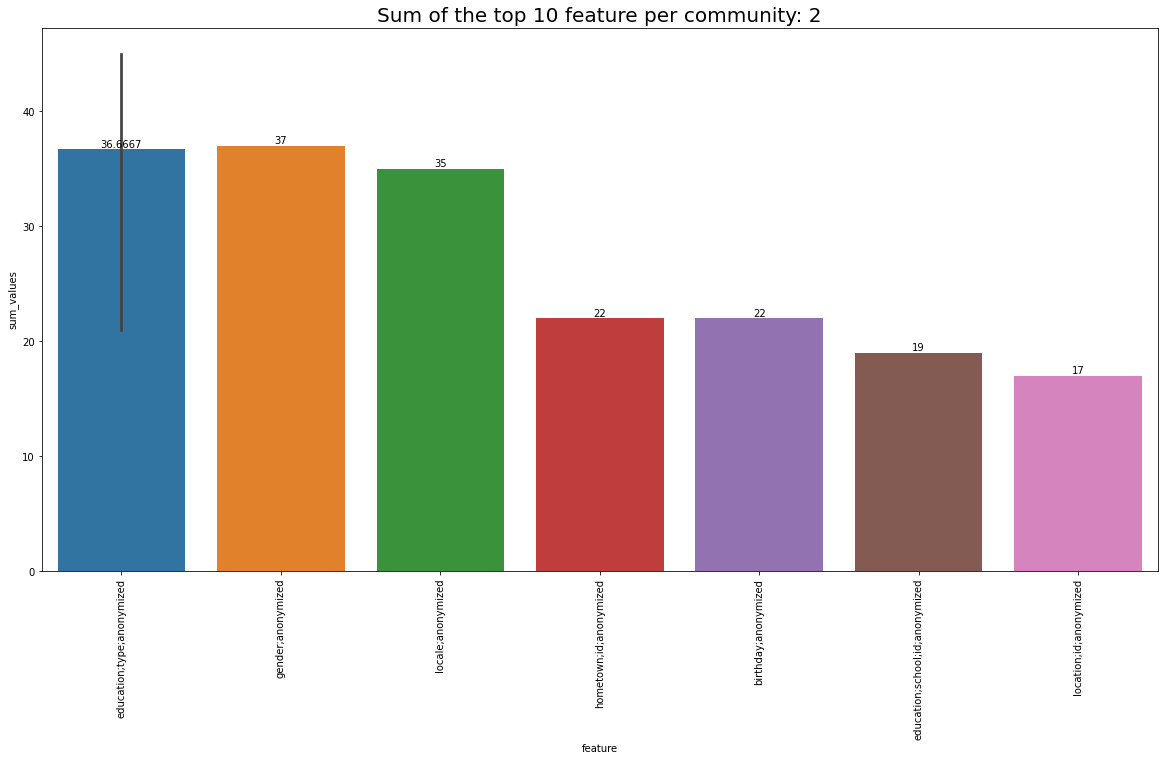

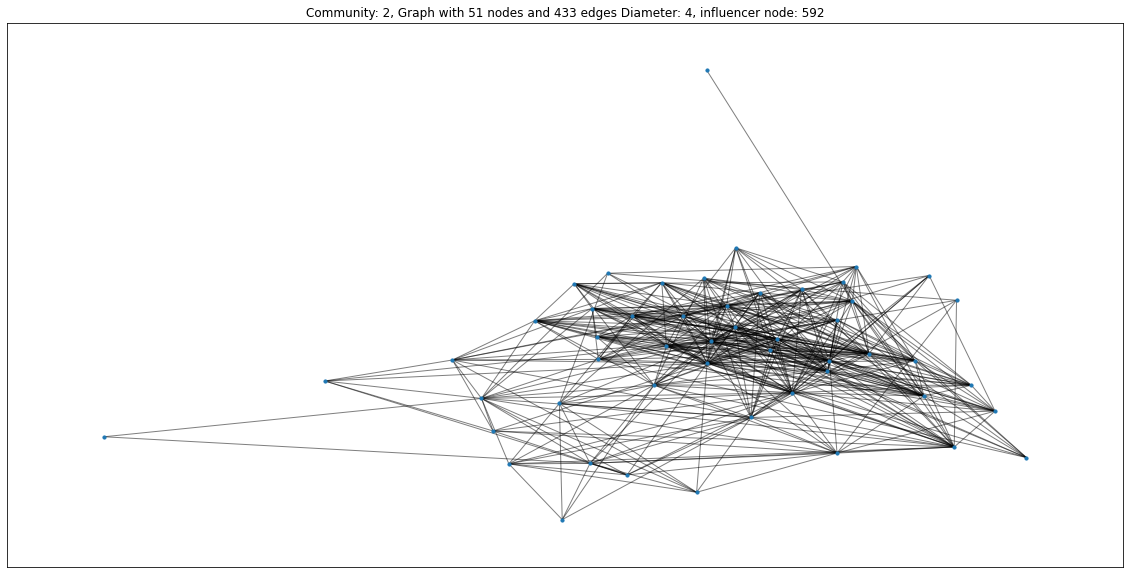

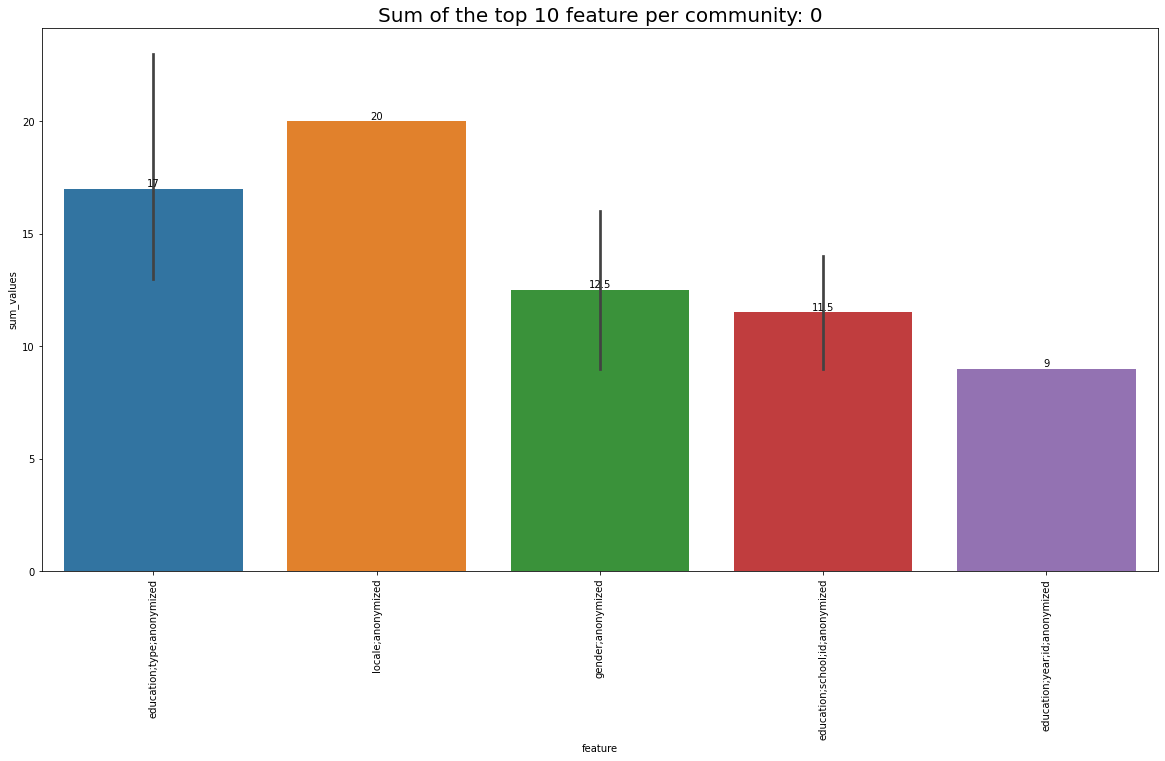

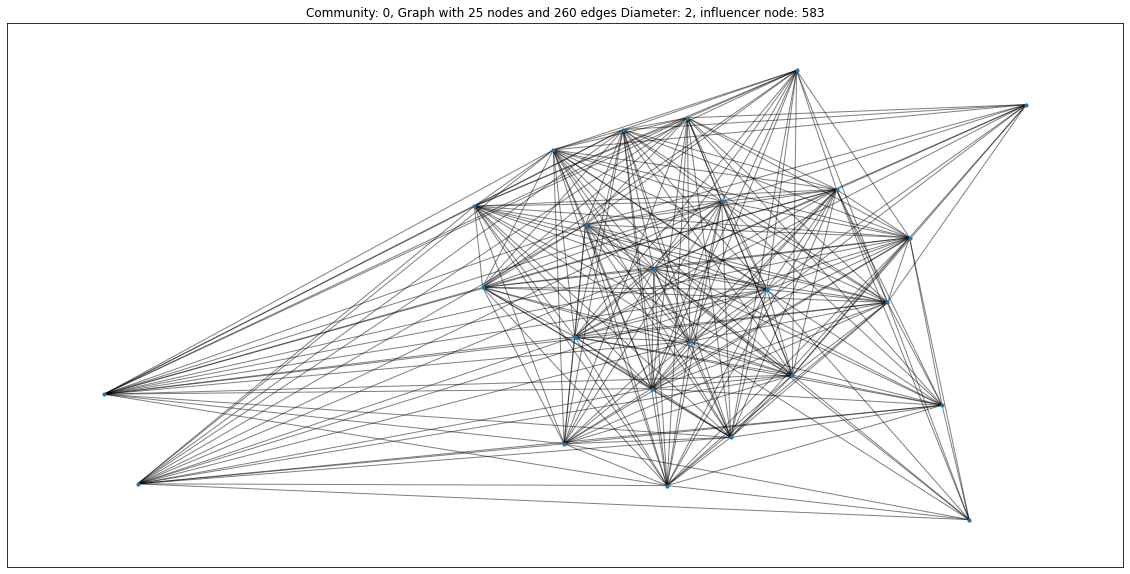

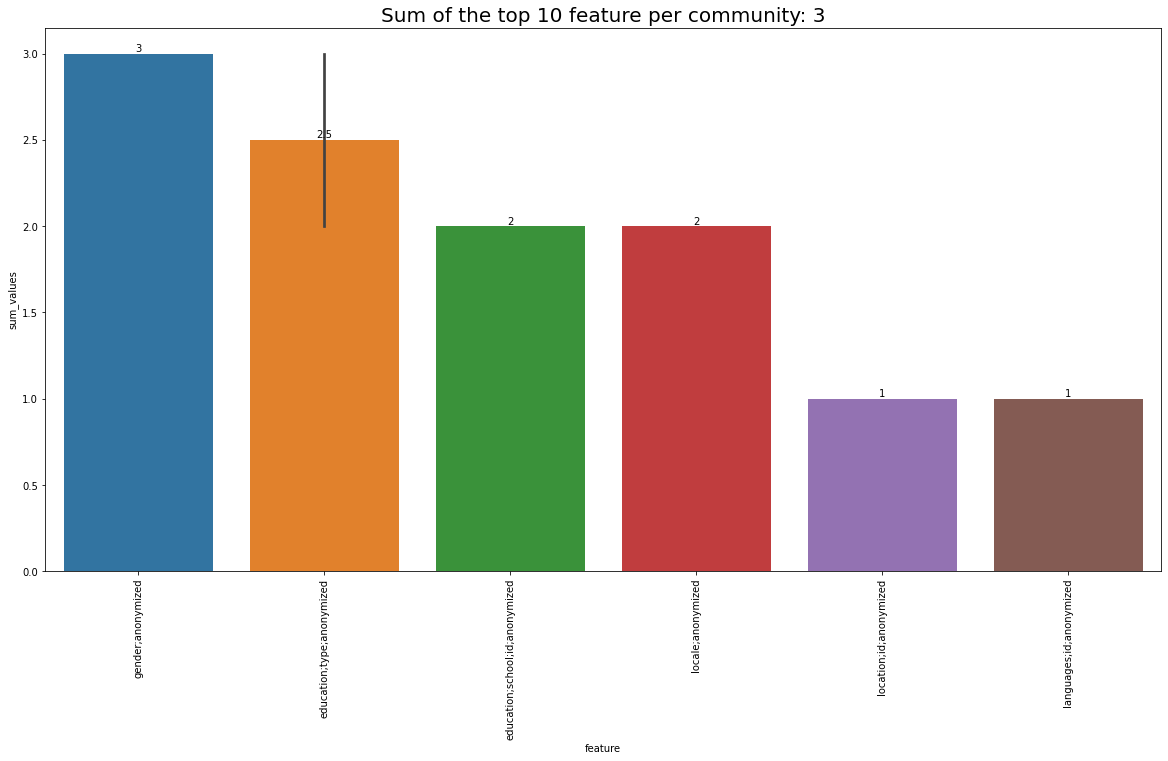

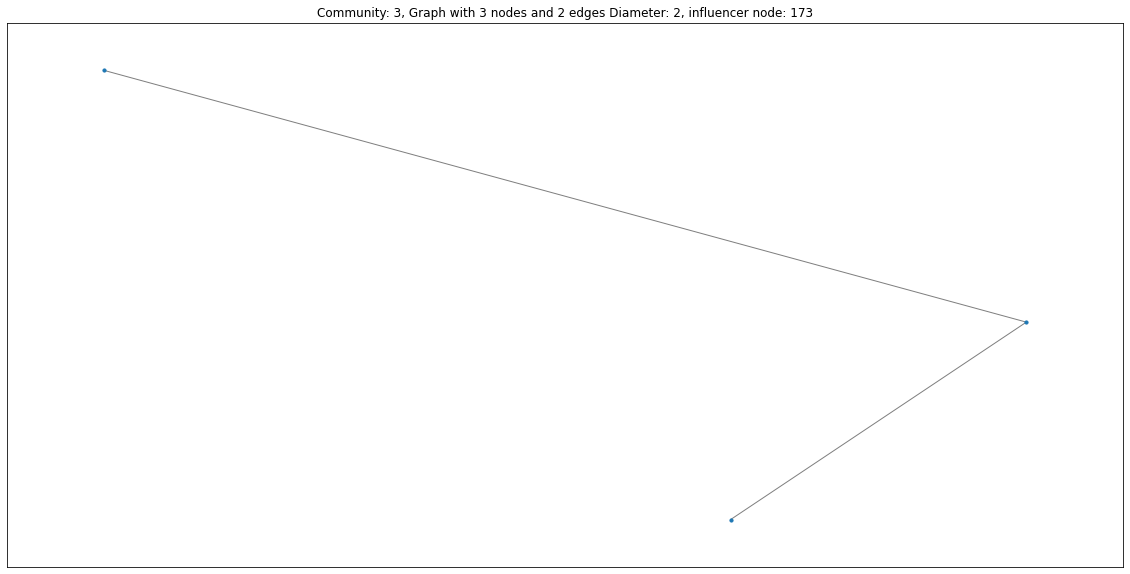

In [33]:
df_communities_statistics = ut.communities_statistics(df_communities,sorted_communities,feat,G)


In [34]:
df_communities_statistics

communities  nodes                          comm_info  comm_avg_distance  \
0            1     69  Graph with 69 nodes and 944 edges           1.660699   
1            2     51  Graph with 51 nodes and 433 edges           1.725490   
2            0     25  Graph with 25 nodes and 260 edges           1.133333   
3            3      3     Graph with 3 nodes and 2 edges           1.333333   

   comm_diameter  comm_density  comm_influencer  
0              4             4              376  
1              4             4              592  
2              2             2              583  
3              2             2              173